In [2]:
# Load various imports
from datetime import datetime
from os import listdir
from os.path import isfile, join
import resampy
import librosa
import librosa.display

import numpy as np
import pandas as pd

import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [6]:
mypath=r"C:\Users\Jiary\Documents\GitHub\ML\archive\Respiratory_Sound_Database\Respiratory_Sound_Database\audio_and_txt_files/"
filenames = [f for f in listdir(mypath) if (isfile(join(mypath, f)) and f.endswith('.wav'))] 
print(filenames)

['101_1b1_Al_sc_Meditron.wav', '101_1b1_Pr_sc_Meditron.wav', '102_1b1_Ar_sc_Meditron.wav', '103_2b2_Ar_mc_LittC2SE.wav', '104_1b1_Al_sc_Litt3200.wav', '104_1b1_Ar_sc_Litt3200.wav', '104_1b1_Ll_sc_Litt3200.wav', '104_1b1_Lr_sc_Litt3200.wav', '104_1b1_Pl_sc_Litt3200.wav', '104_1b1_Pr_sc_Litt3200.wav', '105_1b1_Tc_sc_Meditron.wav', '106_2b1_Pl_mc_LittC2SE.wav', '106_2b1_Pr_mc_LittC2SE.wav', '107_2b3_Al_mc_AKGC417L.wav', '107_2b3_Ar_mc_AKGC417L.wav', '107_2b3_Ll_mc_AKGC417L.wav', '107_2b3_Lr_mc_AKGC417L.wav', '107_2b3_Pl_mc_AKGC417L.wav', '107_2b3_Pr_mc_AKGC417L.wav', '107_2b3_Tc_mc_AKGC417L.wav', '107_2b4_Al_mc_AKGC417L.wav', '107_2b4_Ar_mc_AKGC417L.wav', '107_2b4_Ll_mc_AKGC417L.wav', '107_2b4_Lr_mc_AKGC417L.wav', '107_2b4_Pl_mc_AKGC417L.wav', '107_2b4_Pr_mc_AKGC417L.wav', '107_2b4_Tc_mc_AKGC417L.wav', '107_2b5_Al_mc_AKGC417L.wav', '107_2b5_Ar_mc_AKGC417L.wav', '107_2b5_Ll_mc_AKGC417L.wav', '107_2b5_Lr_mc_AKGC417L.wav', '107_2b5_Pl_mc_AKGC417L.wav', '107_2b5_Pr_mc_AKGC417L.wav', '107_2b5_

In [7]:
p_id_in_file = [] # patient IDs corresponding to each file
for name in filenames:
    p_id_in_file.append(int(name[:3]))

p_id_in_file = np.array(p_id_in_file)
print(p_id_in_file)

[101 101 102 103 104 104 104 104 104 104 105 106 106 107 107 107 107 107
 107 107 107 107 107 107 107 107 107 107 107 107 107 107 107 107 107 107
 107 107 107 107 107 108 109 109 109 109 109 109 110 110 110 110 110 111
 111 112 112 112 112 112 113 113 113 113 113 113 114 114 114 114 114 115
 116 116 117 117 118 118 118 118 118 118 119 120 120 120 120 120 121 121
 122 122 122 122 122 122 122 122 122 123 124 124 124 124 124 124 125 126
 127 128 129 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130
 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130
 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130
 130 130 130 130 130 130 130 130 130 130 130 130 130 130 130 131 132 132
 133 133 133 133 133 133 133 133 133 133 133 133 133 133 133 133 133 133
 133 134 134 134 134 134 135 135 135 135 135 135 135 135 135 135 135 135
 135 136 137 137 138 138 138 138 138 138 138 138 138 138 138 138 138 138
 138 138 138 138 138 138 138 138 138 138 138 138 13

In [8]:
filepaths = [join(mypath, f) for f in filenames] # full paths of files
print(filepaths)

['C:\\Users\\Jiary\\Documents\\GitHub\\ML\\archive\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\audio_and_txt_files/101_1b1_Al_sc_Meditron.wav', 'C:\\Users\\Jiary\\Documents\\GitHub\\ML\\archive\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\audio_and_txt_files/101_1b1_Pr_sc_Meditron.wav', 'C:\\Users\\Jiary\\Documents\\GitHub\\ML\\archive\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\audio_and_txt_files/102_1b1_Ar_sc_Meditron.wav', 'C:\\Users\\Jiary\\Documents\\GitHub\\ML\\archive\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\audio_and_txt_files/103_2b2_Ar_mc_LittC2SE.wav', 'C:\\Users\\Jiary\\Documents\\GitHub\\ML\\archive\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\audio_and_txt_files/104_1b1_Al_sc_Litt3200.wav', 'C:\\Users\\Jiary\\Documents\\GitHub\\ML\\archive\\Respiratory_Sound_Database\\Respiratory_Sound_Database\\audio_and_txt_files/104_1b1_Ar_sc_Litt3200.wav', 'C:\\Users\\Jiary\\Documents\\GitHub\\ML\\archive\\Respiratory_

In [9]:
p_diag =pd.read_csv(r'C:\Users\Jiary\Documents\GitHub\ML\archive\Respiratory_Sound_Database\Respiratory_Sound_Database\patient_diagnosis.csv',
                                     header=None)
print(p_diag.head())

     0        1
0  101     URTI
1  102  Healthy
2  103   Asthma
3  104     COPD
4  105     URTI


In [10]:
labels = np.array([p_diag[p_diag[0] == x][1].values[0] for x in p_id_in_file]) # labels for audio files
print(labels)


['URTI' 'URTI' 'Healthy' 'Asthma' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD'
 'COPD' 'URTI' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD'
 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD'
 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD'
 'COPD' 'COPD' 'LRTI' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD'
 'COPD' 'COPD' 'COPD' 'COPD' 'Bronchiectasis' 'Bronchiectasis' 'COPD'
 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD'
 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'LRTI' 'Bronchiectasis'
 'Bronchiectasis' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD'
 'URTI' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'Healthy' 'Healthy' 'Pneumonia'
 'Pneumonia' 'Pneumonia' 'Pneumonia' 'Pneumonia' 'Pneumonia' 'Pneumonia'
 'Pneumonia' 'Pneumonia' 'Healthy' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD'
 'COPD' 'Healthy' 'Healthy' 'Healthy' 'COPD' 'URTI' 'COPD' 'COPD' 'COPD'
 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD' 'COPD'
 'COPD' 'C

ADD NOISE

In [11]:
def add_noise(data):
    noise_value = 0.015 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])
    return data
    

STRETCH

In [12]:
def stretch_process(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate=0.8)

ADD PITCH

In [13]:
def pitch_process(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sr=sampling_rate, n_steps=pitch_factor)

FEATURE EXTRACTION

EXTRACT FEATURES

In [14]:
def extract_process(data, sample_rate):
    output_result = np.array([])

    mean_zero = np.mean(librosa.feature.zero_crossing_rate(y=data).T, axis=0)
    output_result = np.hstack((output_result, mean_zero))

    stft_out = np.abs(librosa.stft(data))
    chroma_stft = np.mean(librosa.feature.chroma_stft(S=stft_out, sr=sample_rate).T, axis=0)
    output_result = np.hstack((output_result, chroma_stft))

    mfcc_out = np.mean(librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40).T, axis=0)
    output_result = np.hstack((output_result, mfcc_out))

    root_mean_out = np.mean(librosa.feature.rms(y=data).T, axis=0)
    output_result = np.hstack((output_result, root_mean_out))

    mel_spectogram = np.mean(librosa.feature.melspectrogram(y=data, sr=sample_rate).T, axis=0)
    output_result = np.hstack((output_result, mel_spectogram))

    return output_result

EXPORT FEATURES

In [15]:
def extract_features(file_name):
    """
    This function takes in the path for an audio file as a string, loads it,
    and extracts several audio features including mean values of MFCC, Zero Crossing Rate,
    Chromagram, Root Mean Square Energy, and Mel Spectrogram from the original and its augmented versions.
    """
    try:
        # Load the original audio file
        audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast', duration=42, offset=0.6)

        # Extract features from the original audio data
        extracted_features = extract_process(audio, sample_rate)
        result = np.array(extracted_features)

        # Add noise and extract features
        noise_out = add_noise(audio)
        output_2 = extract_process(noise_out, sample_rate)
        result = np.vstack((result, output_2))

        # Time-stretch and then pitch-shift before extracting features
        new_out = stretch_process(audio,0.8)
        stretch_pitch = pitch_process(new_out, sample_rate,pitch_factor=0.7)
        output_3 = extract_process(stretch_pitch, sample_rate)
        result = np.vstack((result, output_3))

    except Exception as e:
        print("Error encountered while parsing file: ", file_name)
        print("Error Details:", e)
        return None

    return result

DATA PROCESSING

TRANSFORMATION AND EXPORTATION

In [16]:
features = []

# Iterate through each sound file and extract the features
for file_name in filepaths:
    data = extract_features(file_name)
    features.append(data)

print('Finished feature extraction from ', len(features), ' files')
features = np.array(features)

C:\Users\Jiary\AppData\Roaming\Python\Python311\site-packages\librosa\core\pitch.py:103: UserWarning: Trying to estimate tuning from empty frequency set.
  return pitch_tuning(


Finished feature extraction from  920  files


In [17]:
features.shape

(920, 3, 182)

In [18]:
# delete the very rare diseases
new_features = np.delete(features, np.where((labels == 'Asthma') | (labels == 'LRTI'))[0], axis=0)

new_labels = np.delete(labels, np.where((labels == 'Asthma') | (labels == 'LRTI'))[0], axis=0)
print(new_features)
print(new_labels)

[[[2.10615094e-03 8.05129886e-01 8.10933948e-01 ... 1.31275911e-07
   1.16167278e-07 1.08914229e-07]
  [1.68311014e-02 8.88376235e-01 8.97175077e-01 ... 2.47971205e-04
   2.46421098e-04 2.50377185e-04]
  [3.00865356e-03 7.53103197e-01 7.28471816e-01 ... 4.04759994e-08
   2.78588388e-08 1.15592846e-09]]

 [[1.89121374e-03 8.23483050e-01 8.33923042e-01 ... 4.26534221e-08
   3.51336666e-08 3.22014024e-08]
  [8.10687051e-03 8.88939960e-01 9.07323949e-01 ... 2.50043088e-05
   2.50486383e-05 2.50882534e-05]
  [1.99471068e-03 7.77762830e-01 7.98557222e-01 ... 1.85884428e-08
   7.80373632e-09 8.94121610e-10]]

 [[2.24749551e-03 8.21666241e-01 8.63873005e-01 ... 5.92148197e-09
   4.41675096e-09 4.03533784e-09]
  [1.06154446e-02 8.65513627e-01 9.02127382e-01 ... 1.83782862e-05
   1.85525644e-05 1.85935173e-05]
  [3.22779605e-03 7.49904811e-01 7.91952610e-01 ... 3.12624016e-09
   8.84791629e-10 7.46023590e-11]]

 ...

 [[3.01963405e-03 8.43667150e-01 8.40449452e-01 ... 7.92069272e-08
   6.7306125

In [19]:
# print class counts
unique_elements, counts_elements = np.unique(new_labels, return_counts=True)
print(np.asarray((unique_elements, counts_elements)))

[['Bronchiectasis' 'Bronchiolitis' 'COPD' 'Healthy' 'Pneumonia' 'URTI']
 ['16' '13' '793' '35' '37' '23']]


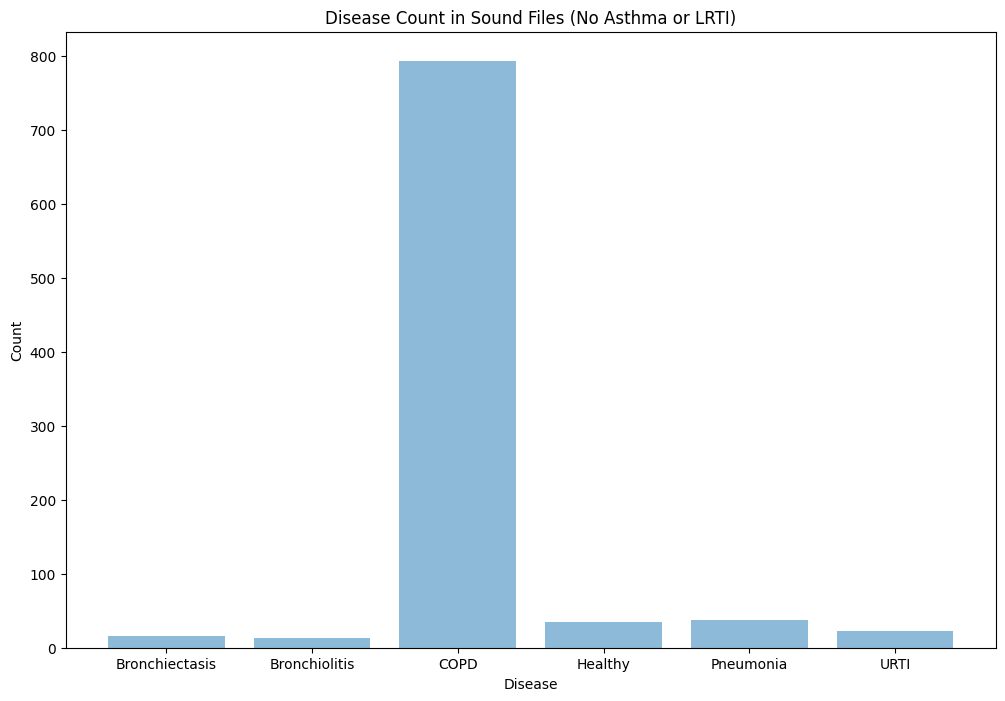

In [20]:
# plot class counts
y_pos = np.arange(len(unique_elements))
plt.figure(figsize=(12,8))
plt.bar(unique_elements, counts_elements, align='center', alpha=0.5)
plt.xticks(y_pos, unique_elements)
plt.ylabel('Count')
plt.xlabel('Disease')
plt.title('Disease Count in Sound Files (No Asthma or LRTI)')
plt.show()

In [21]:
flattened_features = new_features.reshape(-1, 182)
print(flattened_features)

[[2.10615094e-03 8.05129886e-01 8.10933948e-01 ... 1.31275911e-07
  1.16167278e-07 1.08914229e-07]
 [1.68311014e-02 8.88376235e-01 8.97175077e-01 ... 2.47971205e-04
  2.46421098e-04 2.50377185e-04]
 [3.00865356e-03 7.53103197e-01 7.28471816e-01 ... 4.04759994e-08
  2.78588388e-08 1.15592846e-09]
 ...
 [2.02321322e-03 8.21971178e-01 8.51690650e-01 ... 2.78639298e-08
  1.97831937e-08 1.71353385e-08]
 [1.15242552e-02 8.74073844e-01 8.87678326e-01 ... 1.94133709e-04
  1.94865689e-04 1.93411424e-04]
 [2.53252093e-03 7.67021894e-01 7.86819339e-01 ... 2.24281393e-08
  8.91508645e-09 1.39489986e-09]]


In [22]:
augmented_labels = np.repeat(labels, 3)
print(augmented_labels)

['URTI' 'URTI' 'URTI' ... 'Pneumonia' 'Pneumonia' 'Pneumonia']


In [23]:
augmented_features = np.reshape(features, (-1, 182))  # Flatten the feature sets

mask = ~np.isin(augmented_labels, ['Asthma', 'LRTI'])
augmented_features = augmented_features[mask]
augmented_labels = augmented_labels[mask]

In [24]:
le = LabelEncoder()
i_labels = le.fit_transform(augmented_labels)
oh_labels = to_categorical(i_labels)

In [25]:
oh_labels.shape

(2751, 6)

In [26]:
flattened_features.shape

(2751, 182)

In [27]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(flattened_features, oh_labels, stratify=oh_labels,
                                                    test_size=0.2, random_state = 42)

In [28]:
#SCALER & TRANSFORMATION
scaler_data = StandardScaler()

In [29]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2200, 182)
(2200, 6)
(551, 182)
(551, 6)


In [30]:
x_train = scaler_data.fit_transform(x_train)
x_test = scaler_data.transform(x_test)

In [31]:
x_train = np.expand_dims(x_train,axis=2)
x_test = np.expand_dims(x_test,axis=2)

In [32]:
from tensorflow.keras import layers, Sequential

num_labels = len(np.unique(new_labels))  # Determine the number of unique classes

Model = Sequential([
    layers.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu', input_shape=(x_train.shape[1], 1)),
    layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'),
    layers.Conv1D(256, kernel_size=5, strides=1, padding='same', activation='relu'),
    layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'),
    layers.Conv1D(128, kernel_size=5, strides=1, padding='same', activation='relu'),
    layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'),
    layers.Conv1D(64, kernel_size=5, strides=1, padding='same', activation='relu'),
    layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'),
    layers.Conv1D(32, kernel_size=5, strides=1, padding='same', activation='relu'),
    layers.MaxPooling1D(pool_size=5, strides = 2, padding = 'same'),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(units=32, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(units=num_labels, activation='softmax')
])
Model.summary()

C:\Users\Jiary\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 182, 256)       │         1,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 91, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 91, 256)        │       327,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 46, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 46, 128)        │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ (None, 23, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 23, 64)         │        41,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_3 (MaxPooling1D)  │ (None, 12, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_4 (Conv1D)               │ (None, 12, 32)         │        10,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 192)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           198 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 551,110 (2.10 MB)

 Trainable params: 551,110 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

In [33]:
Model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
early_stop = tensorflow.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")

In [34]:
evConv1D_Model = Model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_test, y_test), callbacks=[early_stop])

Epoch 1/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 17s 344ms/step - accuracy: 0.7226 - loss: 1.0358 - val_accuracy: 0.8639 - val_loss: 0.5858
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 311ms/step - accuracy: 0.8668 - loss: 0.6523 - val_accuracy: 0.8639 - val_loss: 0.5322
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 318ms/step - accuracy: 0.8562 - loss: 0.5794 - val_accuracy: 0.8639 - val_loss: 0.4677
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 356ms/step - accuracy: 0.8690 - loss: 0.5042 - val_accuracy: 0.8639 - val_loss: 0.4316
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 19s 307ms/step - accuracy: 0.8626 - loss: 0.4916 - val_accuracy: 0.8639 - val_loss: 0.4143
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 346ms/step - accuracy: 0.8519 - loss: 0.4639 - val_accuracy: 0.8639 - val_loss: 0.4002
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 314ms/step - accuracy: 0.8628 - loss: 0.4073 - val_accuracy: 0.8639 - val_loss: 0.3950
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 14s 388ms/step - accuracy: 0.8615 - loss: 0.3875 - 

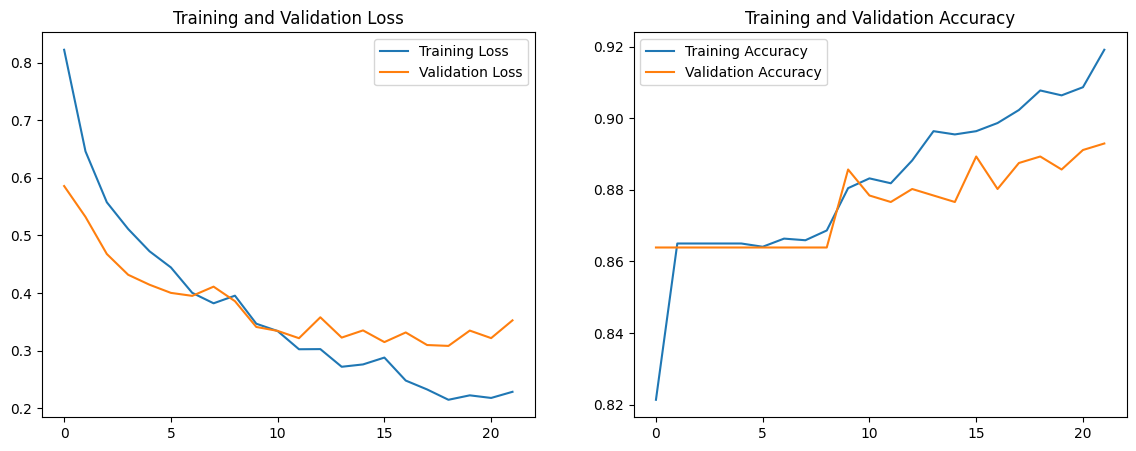

In [ ]:
# Plotting loss
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(evConv1D_Model.history['loss'], label='Training Loss')
plt.plot(evConv1D_Model.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(evConv1D_Model.history['accuracy'], label='Training Accuracy')
plt.plot(evConv1D_Model.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.show()

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step


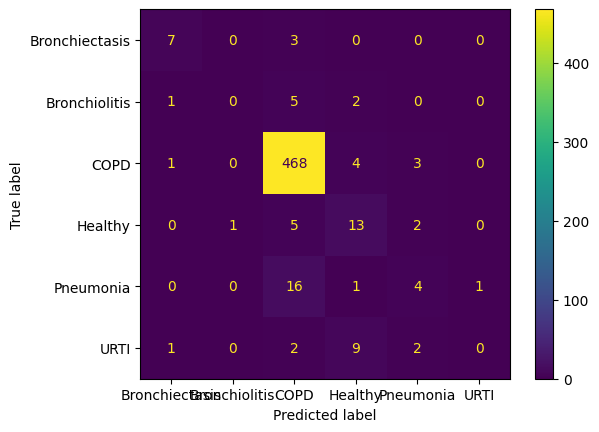

In [36]:
# Getting the predictions
y_pred = Model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generating the confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# Displaying the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_mtx, display_labels=le.classes_).plot()

In [37]:
Model.save('respiratory.model.h5')  
